In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cPickle as pkl
from sklearn.datasets import make_moons, make_blobs
from sklearn.decomposition import PCA
from IPython.display import SVG

from flip_gradient import flip_gradient
from utils import *

In [2]:
all_features_by_week = pd.read_csv('ncu_data_week_1-18(3a).csv', sep=',')
all_features_by_week.drop(['username'], axis=1, inplace=True)
for i in range(128-59):
    all_features_by_week = all_features_by_week.append(all_features_by_week.sample(1))


feature_header = list(all_features_by_week)[1 : 20]
cluster_header = 'cluster'
Xt = all_features_by_week[feature_header].values
yt = all_features_by_week[cluster_header].values
all_features_by_week.describe()

,active_num_days,active_sum_count,video_num_days,num_watched,num_complete,seek_video_sum,pause_video_sum,stop_video_sum,video_sum_count,video_forward_seek_sum,video_backward_seek_sum,video_pause_sum,video_stop_sum,mt_practice_sum,mt_unit_sum,mt_online_num_day,mt_online_practice_num_day,hw_mean,qz_mean,cluster
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,1.714410,258.327691,0.904948,3.065972,1.948351,1.718750,2.274306,1.614149,37.280382,8.143229,4.109809,9.327257,1.736979,2.712240,0.922743,0.657986,1.076823,9.021354,7.280816,0.648438
std,0.739652,149.206404,0.503519,2.069709,1.579896,1.406749,1.582349,1.371347,36.506143,11.301442,4.302097,7.998473,1.506918,1.615840,0.412879,0.321716,0.535015,1.713390,2.162252,0.479334
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.222222,149.500000,0.444444,1.222222,0.500000,0.444444,0.902778,0.444444,9.902778,1.722222,0.777778,2.166667,0.486111,1.611111,0.666667,0.444444,0.722222,9.308333,5.666667,0.000000
50%,1.833333,248.111111,1.000000,2.666667,1.500000,1.333333,2.111111,1.166667,30.555556,4.388889,3.611111,7.500000,1.333333,2.611111,1.000000,0.611111,1.055556,9.611111,7.777778,1.000000
75%,2.277778,352.347222,1.277778,4.416667,2.888889,2.277778,3.236111,2.625000,50.444444,8.347222,5.444444,12.277778,2.777778,3.500000,1.333333,0.944444,1.666667,9.811111,9.333333,1.000000
max,3.222222,594.388889,2.111111,8.611111,7.500000,6.222222,6.500000,7.111111,220.500000,57.611111,21.333333,32.777778,8.222222,7.166667,1.611111,1.222222,1.944444,9.977778,9.888889,1.000000


In [3]:
#all_features_by_week = pd.read_csv('ncu_data_week_chkb_1-6(59).csv', sep=',')
all_features_by_week = pd.read_csv('ncu_data_week_1-6.csv', sep=',')
feature_header = list(all_features_by_week)[1 : 20]
cluster_header = 'cluster'
Xs = all_features_by_week[feature_header].values
ys = all_features_by_week[cluster_header].values
all_features_by_week.describe()

,active_num_days,active_sum_count,video_num_days,num_watched,num_complete,seek_video_sum,pause_video_sum,stop_video_sum,video_sum_count,video_forward_seek_sum,video_backward_seek_sum,video_pause_sum,video_stop_sum,mt_practice_sum,mt_unit_sum,mt_online_num_day,mt_online_practice_num_day,hw_mean,qz_mean,cluster
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,10.187500,2355.359375,7.375000,28.796875,21.242188,15.429688,26.203125,4.703125,251.070312,60.710938,39.445312,115.109375,4.828125,9.367188,4.164062,4.007812,5.390625,1.785896,42.769531,0.218750
std,8.674108,2106.327340,6.304604,24.206578,20.644629,17.049573,23.083675,5.201997,328.536919,138.537306,68.308103,141.995355,5.390440,15.962491,5.462510,6.175257,7.767522,2.799147,30.621016,0.415023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,544.250000,2.750000,9.000000,4.000000,2.750000,8.000000,0.000000,34.750000,3.000000,2.000000,15.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.375000,0.000000
50%,7.500000,1876.000000,6.000000,22.000000,15.000000,11.000000,19.000000,3.000000,128.000000,16.500000,14.000000,61.000000,3.000000,2.000000,2.000000,1.000000,2.000000,0.286765,36.750000,0.000000
75%,15.000000,3522.250000,11.000000,49.250000,35.000000,26.000000,42.750000,7.000000,379.250000,50.000000,50.000000,159.500000,7.000000,10.250000,5.250000,5.250000,6.250000,2.426471,71.458333,0.000000
max,34.000000,10910.000000,24.000000,127.000000,114.000000,107.000000,118.000000,26.000000,2444.000000,1153.000000,483.000000,653.000000,27.000000,87.000000,18.000000,34.000000,31.000000,10.000000,100.833333,1.000000


In [4]:
num_test = 100
combined_test_data = np.concatenate([Xs[:num_test], Xt[:num_test]])  # 取出兩個資料集的最後500筆資料
combined_test_labels = np.concatenate([ys[:num_test], yt[:num_test]])  # 資料的lable(0~9)
combined_test_domain = np.concatenate([np.tile([1., 0.], [num_test, 1]),
        np.tile([0., 1.], [num_test, 1])])



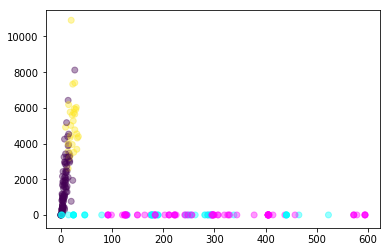

In [5]:
# source: yellow and purple
plt.scatter(Xs[:,0], Xs[:,1], c=ys, alpha=0.4) 

# target: light blue and pink
plt.scatter(Xt[:,0], Xt[:,1], c=yt, cmap='cool', alpha=0.4, label='target')


In [15]:
#batch_size = 16
batch_size = 49

def build_model(shallow_domain_classifier=True):
    X = tf.placeholder(tf.float32, [None, 19], name='X') # Input data
    Y_index = tf.placeholder(tf.int32, [None], name='Y_index')  # Class index
    D_index = tf.placeholder(tf.int32, [None], name='D_index')  # Domain index
    train = tf.placeholder(tf.bool, [], name='train')       # Switch for routing data to class predictor
    l = tf.placeholder(tf.float32, [], name='l')        # Gradient reversal scaler
    #print 'X', X
    #print 'train', train
    #print 'l', l
    
    Y = tf.one_hot(Y_index, 2)
    D = tf.one_hot(D_index, 2)

    # Feature extractor - single layer
    W0 = weight_variable([19, 38])
    b0 = bias_variable([38])
    F = tf.nn.relu(tf.matmul(X, W0) + b0, name='feature')
    #print tf.slice(F, [0, 0], [batch_size / 2, -1])
    #print 'F', F
    
    # Label predictor - single layer
    f = tf.cond(train, lambda: tf.slice(F, [0, 0], [batch_size / 2, -1]), lambda: F)
    y = tf.cond(train, lambda: tf.slice(Y, [0, 0], [batch_size / 2, -1]), lambda: Y)

    W1 = weight_variable([38, 2])
    b1 = bias_variable([2])
    p_logit = tf.matmul(f, W1) + b1
    p = tf.nn.softmax(p_logit)
    p_loss = tf.nn.softmax_cross_entropy_with_logits(logits=p_logit, labels=y)

    #print 'p_logit', p_logit
    
    # Domain predictor - shallow
    f_ = flip_gradient(F, l)

    if shallow_domain_classifier:
        W2 = weight_variable([38, 2])
        b2 = bias_variable([2])
        d_logit = tf.matmul(f_, W2) + b2
        d = tf.nn.softmax(d_logit)
        d_loss = tf.nn.softmax_cross_entropy_with_logits(logits=d_logit, labels=D)

    else:
        W2 = weight_variable([38, 8])
        b2 = bias_variable([8])
        h2 = tf.nn.relu(tf.matmul(f_, W2) + b2)

        W3 = weight_variable([8, 2])
        b3 = bias_variable([2])
        d_logit = tf.matmul(h2, W3) + b3
        d = tf.nn.softmax(d_logit)
        d_loss = tf.nn.softmax_cross_entropy_with_logits(logits=d_logit, labels=D)


    #print 'd_logit\t', d_logit
        
    # Optimization
    pred_loss = tf.reduce_sum(p_loss, name='pred_loss')
    domain_loss = tf.reduce_sum(d_loss, name='domain_loss')
    total_loss = tf.add(pred_loss, domain_loss, name='total_loss')

    pred_train_op = tf.train.AdamOptimizer(0.01).minimize(pred_loss, name='pred_train_op')
    domain_train_op = tf.train.AdamOptimizer(0.01).minimize(domain_loss, name='domain_train_op')
    dann_train_op = tf.train.AdamOptimizer(0.01).minimize(total_loss, name='dann_train_op')

    # Evaluation
    p_acc = tf.reduce_mean(tf.cast(tf.equal(tf.arg_max(y, 1), tf.arg_max(p, 1)), tf.float32), name='p_acc')
    d_acc = tf.reduce_mean(tf.cast(tf.equal(tf.arg_max(D, 1), tf.arg_max(d, 1)), tf.float32), name='d_acc')
    
    #writer = tf.train.write_graph(sess.graph_def, '/notebooks/tf-dann/model-test', 'train.pb')
    #writer = tf.summary.FileWriter('/notebooks/tf-dann/model-test', graph = sess.graph)


In [7]:

build_model()

sess = tf.InteractiveSession()

def train_and_evaluate(sess, 
                       train_op_name, 
                       train_loss_name, 
                       model='dann', 
                       grad_scale=None, 
                       num_batches=10000, 
                       verbose=True):
    
    # Create batch builders
    S_batches = batch_generator([Xs, ys], batch_size / 2)
    T_batches = batch_generator([Xt, yt], batch_size / 2)
    
    # Get output tensors and train op
    d_acc = sess.graph.get_tensor_by_name('d_acc:0')
    p_acc = sess.graph.get_tensor_by_name('p_acc:0')
    train_loss = sess.graph.get_tensor_by_name(train_loss_name + ':0')
    train_op = sess.graph.get_operation_by_name(train_op_name)
    
    
    writer = tf.summary.FileWriter('/notebooks/tf-dann/model-test', graph = sess.graph)
    sess.run(tf.initialize_all_variables())
    for i in range(num_batches):

        # If no grad_scale, use a schedule
        if grad_scale is None:
            p = float(i) / num_batches
            lp = 2. / (1. + np.exp(-10. * p)) - 1
        else:
            lp = grad_scale

        if model == 'dann':
            X0, y0 = S_batches.next()
            X1, y1 = T_batches.next()

            Xb = np.vstack([X0, X1])
            yb = np.hstack([y0, y1])
            D_labels = np.hstack([np.zeros(batch_size / 2, dtype=np.int32),
                                  np.ones(batch_size / 2, dtype=np.int32)])

            _, loss, da, pa = sess.run([train_op, train_loss, d_acc, p_acc],
                                       feed_dict={'X:0': Xb, 
                                                  'Y_index:0': yb, 
                                                  'D_index:0': D_labels,
                                                  'train:0': True, 
                                                  'l:0': lp})

            if verbose and i % (num_batches / 5) == 0:
                print 'loss: %f, domain accuracy: %f, class accuracy: %f' % (loss, da, pa)
                
        elif model == 'source':
            X0, y0 = S_batches.next()
            Xb = np.vstack([X0])
            yb = np.hstack([y0])
            D_labels = np.hstack([np.zeros(batch_size / 4, dtype=np.int32),
                                  np.ones(batch_size / 4, dtype=np.int32)])
            
            _, loss, da, pa = sess.run([train_op, train_loss, d_acc, p_acc],
                                       feed_dict={'X:0': Xb, 
                                                  'Y_index:0': yb, 
                                                  'D_index:0': D_labels,
                                                  'train:0': True, 
                                                  'l:0': lp})
            if verbose and i % (num_batches / 5) == 0:
                print 'loss: %f, domain accuracy: %f, class accuracy: %f' % (loss, da, pa)

        elif model == 'target':
            X0, y0 = T_batches.next()
            Xb = np.vstack([X0])
            yb = np.hstack([y0])
            D_labels = np.hstack([np.zeros(batch_size / 4, dtype=np.int32),
                                  np.ones(batch_size / 4, dtype=np.int32)])
            
            _, loss, da, pa = sess.run([train_op, train_loss, d_acc, p_acc],
                                       feed_dict={'X:0': Xb, 
                                                  'Y_index:0': yb, 
                                                  'D_index:0': D_labels,
                                                  'train:0': True, 
                                                  'l:0': lp})
            if verbose and i % (num_batches / 5) == 0:
                print 'loss: %f, domain accuracy: %f, class accuracy: %f' % (loss, da, pa)
                
                
    # Get final accuracies on whole dataset
    das, acc_source_classification = sess.run([d_acc, p_acc], feed_dict={'X:0': Xs, 
                                                   'Y_index:0': ys, 
                                                   'D_index:0': np.zeros(Xs.shape[0], dtype=np.int32), 
                                                   'train:0': False, 
                                                   'l:0': 1.0})
    dat, acc_target_classification = sess.run([d_acc, p_acc], feed_dict={'X:0': Xt, 
                                                   'Y_index:0': yt,
                                                   'D_index:0': np.ones(Xt.shape[0], dtype=np.int32), 
                                                   'train:0': False, 
                                                   'l:0': 1.0})
    dax, acc_domain_classification = sess.run([d_acc, p_acc], feed_dict={'X:0': combined_test_data, 
                                                   'Y_index:0': combined_test_domain.argmax(1),
                                                   'D_index:0': np.ones(combined_test_data.shape[0], dtype=np.int32), 
                                                   'train:0': False, 
                                                   'l:0': 1.0})
    
    result_feature_extraction = sess.run('feature:0', feed_dict={'X:0': combined_test_data})
    
    return acc_source_classification, acc_target_classification, acc_domain_classification, result_feature_extraction

def extract_and_plot_pca_feats(sess, feat_tensor_name='feature'):
    F = sess.graph.get_tensor_by_name(feat_tensor_name + ':0')
    emb_s = sess.run(F, feed_dict={'X:0': Xs})
    emb_t = sess.run(F, feed_dict={'X:0': Xt})
    emb_all = np.vstack([emb_s, emb_t])

    pca = PCA(n_components=2)
    pca_emb = pca.fit_transform(emb_all)

    num = pca_emb.shape[0] / 2
    plt.scatter(pca_emb[:num,0], pca_emb[:num,1], c=ys, alpha=0.4)
    plt.scatter(pca_emb[num:,0], pca_emb[num:,1], c=yt, cmap='cool', alpha=0.4)

Instructions for updating:
Use `argmax` instead



Source only training
+ Source (MNIST) accuracy: 0.9847
+ Target (MNIST-M) accuracy: 0.5463

Domain adaptation training
+ Source (MNIST) accuracy: 0.9779
+ Target (MNIST-M) accuracy: 0.7141
+ Domain accuracy: 0.693

In [16]:
num_batches=5000
grad_scale=0.2

print '\nSource only training'
source_acc, target_acc, _, source_only_emb = train_and_evaluate(sess, 
                                               'pred_train_op', 
                                               'pred_loss', 
                                               verbose=False, 
                                               model='source',
                                               grad_scale=grad_scale,
                                               num_batches=num_batches)
print 'Source (Senior) accuracy: (Apply source model to source)', source_acc
print 'Target (College) accuracy: (Apply source model to target)', target_acc


print '\nTarget only training'
source_acc, target_acc, _, source_only_emb = train_and_evaluate(sess, 
                                               'pred_train_op', 
                                               'pred_loss', 
                                               verbose=False, 
                                               model='target',
                                               grad_scale=grad_scale,
                                               num_batches=num_batches)
print 'Source (Senior) accuracy: (Apply target model to source)', source_acc
print 'Target (College) accuracy: (Apply target model to target)', target_acc

print '\nDomain adaptation training'
source_acc, target_acc, d_acc, dann_emb = train_and_evaluate(sess, 
                                                   'dann_train_op', 
                                                   'total_loss', 
                                                   verbose=False, 
                                                   model='dann',
                                                   grad_scale=grad_scale,
                                                   num_batches=num_batches)

print 'Source (Senior) accuracy (Apply domain model to source):', source_acc
print 'Target (College) accuracy (Apply domain model to target):', target_acc
print 'Domain classification accuracy:', d_acc


Source only training
Source (Senior) accuracy: (Apply source model to source) 1.0
Target (College) accuracy: (Apply source model to target) 0.351562

Target only training
Source (Senior) accuracy: (Apply target model to source) 0.703125
Target (College) accuracy: (Apply target model to target) 1.0

Domain adaptation training
Source (Senior) accuracy (Apply domain model to source): 0.945312
Target (College) accuracy (Apply domain model to target): 0.726562
Domain classification accuracy: 0.865


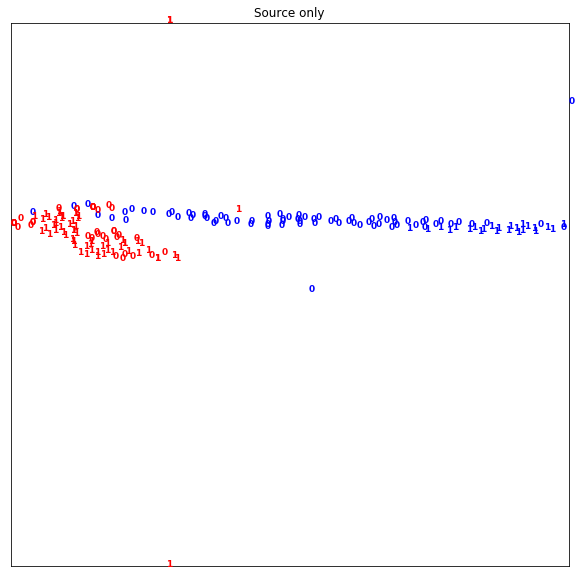

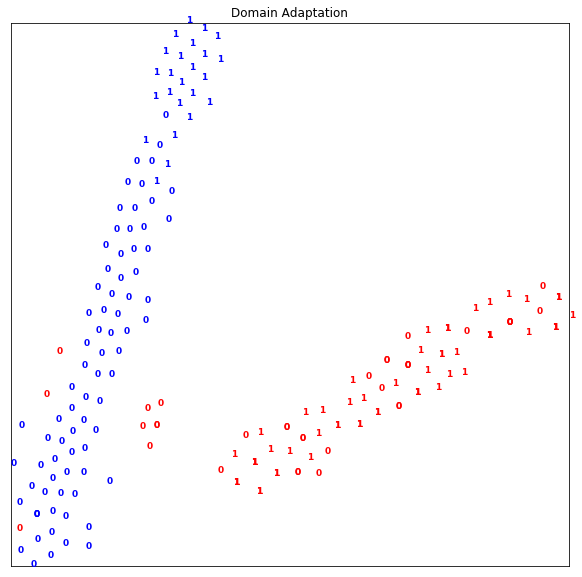

In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=10000)
source_only_tsne = tsne.fit_transform(source_only_emb)
plot_embedding(source_only_tsne, 
               combined_test_labels, 
               combined_test_domain.argmax(1), 
               'Source only')

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=10000)
dann_tsne = tsne.fit_transform(dann_emb)
plot_embedding(dann_tsne, 
               combined_test_labels,
               combined_test_domain.argmax(1),
               'Domain Adaptation')